<a href="https://colab.research.google.com/github/DuskVeil/data-science-bootcamp/blob/main/02_analiza_danych/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Pandas
>Strona biblioteki: [https://pandas.pydata.org/](https://pandas.pydata.org/)  
>Dokumentacja: [https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/)
>
>Podstawowa biblioteka do analizy danych w języku Python.
>
>Aby zainstalować bibliotekę Pandas użyj polecenia poniżej:
```
pip install pandas
```
### Spis treści:
1. [Import Bibliotek](#a1)
2. [Załadowanie danych](#a2)
3. [Eksploracja danych](#a3)
4. [Selekcja kolumn](#a4)
5. [Selekcja wierszy](#a5)
6. [Obliczanie nowych kolumn](#a6)
7. [Filtrowanie danych](#a7)










### <a name='a1'></a> Import Bibliotek

In [ ]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.17.4
Pandas: 0.25.3


### <a name='a2'></a> Załadowanie danych

In [1]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2025-03-18 to 2020-03-20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1255 non-null   float64
 1   High    1255 non-null   float64
 2   Low     1255 non-null   float64
 3   Close   1255 non-null   float64
 4   Volume  1255 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.8 KB


In [2]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2025-03-18,192.5200,194.0000,189.3800,192.8200,40414867
2025-03-17,198.7700,199.0000,194.3247,195.7400,47341752
2025-03-14,197.4100,198.6500,195.3200,197.9500,38096663
2025-03-13,198.1650,198.8799,191.8200,193.8900,41270761
2025-03-12,200.7200,201.5200,195.2900,198.8900,43679284
...,...,...,...,...,...
2020-03-26,95.1000,97.8245,94.4645,97.7745,124702360
2020-03-25,96.0345,97.5130,94.2890,94.2920,129581460
2020-03-24,97.5748,97.7500,95.0170,97.0050,142941600


In [4]:
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2025-03-18,192.520,194.0000,189.3800,192.82,40414867
2025-03-17,198.770,199.0000,194.3247,195.74,47341752
2025-03-14,197.410,198.6500,195.3200,197.95,38096663
2025-03-13,198.165,198.8799,191.8200,193.89,41270761
2025-03-12,200.720,201.5200,195.2900,198.89,43679284
2025-03-11,193.900,200.1800,193.4000,196.59,54002880
2025-03-10,195.600,196.7300,190.8500,194.54,62350926
2025-03-07,199.490,202.2653,192.5300,199.25,59802821
2025-03-06,204.400,205.7700,198.3015,200.70,49863755


In [5]:
df.tail(5)

,Open,High,Low,Close,Volume
Date,,,,,
2020-03-26,95.1000,97.8245,94.4645,97.7745,124702360
2020-03-25,96.0345,97.5130,94.2890,94.2920,129581460
2020-03-24,97.5748,97.7500,95.0170,97.0050,142941600
2020-03-23,91.3875,95.9700,90.6000,95.1415,156169780
2020-03-20,96.3155,97.8500,91.0365,92.3045,196357000


In [6]:
df.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2020-04-02,95.0820,96.3763,94.5000,95.9415,86719700
2020-04-01,96.6485,97.2480,94.6500,95.3850,82437500
2020-03-31,98.2175,99.6510,97.2005,97.4860,102472520
2020-03-30,96.1415,98.6815,95.6170,98.1975,122521740
2020-03-27,96.5430,96.9895,94.9960,95.0050,107757940
2020-03-26,95.1000,97.8245,94.4645,97.7745,124702360
2020-03-25,96.0345,97.5130,94.2890,94.2920,129581460
2020-03-24,97.5748,97.7500,95.0170,97.0050,142941600
2020-03-23,91.3875,95.9700,90.6000,95.1415,156169780


In [7]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [8]:
df.columns = [col.lower() for col in df.columns]
df.head()

,open,high,low,close,volume
Date,,,,,
2025-03-18,192.520,194.0000,189.3800,192.82,40414867
2025-03-17,198.770,199.0000,194.3247,195.74,47341752
2025-03-14,197.410,198.6500,195.3200,197.95,38096663
2025-03-13,198.165,198.8799,191.8200,193.89,41270761
2025-03-12,200.720,201.5200,195.2900,198.89,43679284


In [9]:
df.describe()

,open,high,low,close,volume
count,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03
mean,151.900908,153.729425,149.903904,151.849751,6.569977e+07
std,33.548512,33.611790,33.336629,33.481359,3.161387e+07
min,82.800000,83.480000,81.430000,81.820000,1.500750e+07
25%,126.210000,128.290000,124.620000,126.490000,4.432827e+07
50%,156.837000,158.794000,154.734000,156.783000,5.859728e+07
75%,173.384500,174.806000,171.621000,173.141000,7.753422e+07
max,239.015000,242.520000,238.030000,242.060000,2.726617e+08


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1255.0,1.519009e+02,3.354851e+01,82.80,126.21,1.568370e+02,1.733845e+02,2.390150e+02
high,1255.0,1.537294e+02,3.361179e+01,83.48,128.29,1.587940e+02,1.748060e+02,2.425200e+02
low,1255.0,1.499039e+02,3.333663e+01,81.43,124.62,1.547340e+02,1.716210e+02,2.380300e+02
close,1255.0,1.518498e+02,3.348136e+01,81.82,126.49,1.567830e+02,1.731410e+02,2.420600e+02
volume,1255.0,6.569977e+07,3.161387e+07,15007497.00,44328270.00,5.859728e+07,7.753422e+07,2.726617e+08


### <a name='a3'></a> Eksploracja danych

### <a name='a4'></a> Selekcja kolumn

In [12]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2025-03-18,192.520,194.0000,189.3800,192.82,40414867
2025-03-17,198.770,199.0000,194.3247,195.74,47341752
2025-03-14,197.410,198.6500,195.3200,197.95,38096663
2025-03-13,198.165,198.8799,191.8200,193.89,41270761
2025-03-12,200.720,201.5200,195.2900,198.89,43679284
2025-03-11,193.900,200.1800,193.4000,196.59,54002880
2025-03-10,195.600,196.7300,190.8500,194.54,62350926
2025-03-07,199.490,202.2653,192.5300,199.25,59802821
2025-03-06,204.400,205.7700,198.3015,200.70,49863755


In [13]:
df['open']

,open
Date,
2025-03-18,192.520
2025-03-17,198.770
2025-03-14,197.410
2025-03-13,198.165
2025-03-12,200.720
2025-03-11,193.900
2025-03-10,195.600
2025-03-07,199.490
2025-03-06,204.400


In [14]:
df.open

,open
Date,
2025-03-18,192.520
2025-03-17,198.770
2025-03-14,197.410
2025-03-13,198.165
2025-03-12,200.720
2025-03-11,193.900
2025-03-10,195.600
2025-03-07,199.490
2025-03-06,204.400


In [18]:
df[['open', 'close']]

,open,close
Date,,
2025-03-18,192.520,192.82
2025-03-17,198.770,195.74
2025-03-14,197.410,197.95
2025-03-13,198.165,193.89
2025-03-12,200.720,198.89
2025-03-11,193.900,196.59
2025-03-10,195.600,194.54
2025-03-07,199.490,199.25
2025-03-06,204.400,200.70


In [19]:
df.iloc[:, 0]

,open
Date,
2025-03-18,192.520
2025-03-17,198.770
2025-03-14,197.410
2025-03-13,198.165
2025-03-12,200.720
2025-03-11,193.900
2025-03-10,195.600
2025-03-07,199.490
2025-03-06,204.400


In [22]:
df.iloc[:, [0, 3]]

,open,close
Date,,
2025-03-18,192.520,192.82
2025-03-17,198.770,195.74
2025-03-14,197.410,197.95
2025-03-13,198.165,193.89
2025-03-12,200.720,198.89
2025-03-11,193.900,196.59
2025-03-10,195.600,194.54
2025-03-07,199.490,199.25
2025-03-06,204.400,200.70


In [26]:
df.iloc[:, 3:5]

,close,volume
Date,,
2025-03-18,192.82,40414867
2025-03-17,195.74,47341752
2025-03-14,197.95,38096663
2025-03-13,193.89,41270761
2025-03-12,198.89,43679284
2025-03-11,196.59,54002880
2025-03-10,194.54,62350926
2025-03-07,199.25,59802821
2025-03-06,200.70,49863755


In [32]:
df.iloc[:, -3:]

,low,close,volume
Date,,,
2025-03-18,189.3800,192.82,40414867
2025-03-17,194.3247,195.74,47341752
2025-03-14,195.3200,197.95,38096663
2025-03-13,191.8200,193.89,41270761
2025-03-12,195.2900,198.89,43679284
2025-03-11,193.4000,196.59,54002880
2025-03-10,190.8500,194.54,62350926
2025-03-07,192.5300,199.25,59802821
2025-03-06,198.3015,200.70,49863755


### <a name='a5'></a>  Selekcja wierszy

In [33]:
df

,open,high,low,close,volume
Date,,,,,
2025-03-18,192.520,194.0000,189.3800,192.82,40414867
2025-03-17,198.770,199.0000,194.3247,195.74,47341752
2025-03-14,197.410,198.6500,195.3200,197.95,38096663
2025-03-13,198.165,198.8799,191.8200,193.89,41270761
2025-03-12,200.720,201.5200,195.2900,198.89,43679284
2025-03-11,193.900,200.1800,193.4000,196.59,54002880
2025-03-10,195.600,196.7300,190.8500,194.54,62350926
2025-03-07,199.490,202.2653,192.5300,199.25,59802821
2025-03-06,204.400,205.7700,198.3015,200.70,49863755


In [34]:
df.iloc[0]

,2025-03-18
open,192.52
high,194.00
low,189.38
close,192.82
volume,40414867.00


In [35]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2025-03-18,192.52,194.00,189.3800,192.82,40414867
2025-03-17,198.77,199.00,194.3247,195.74,47341752
2025-03-14,197.41,198.65,195.3200,197.95,38096663


In [37]:
df.loc['2025-03-18']

,2025-03-18
open,192.52
high,194.00
low,189.38
close,192.82
volume,40414867.00


In [45]:
df.loc['2025-03-18': '2025-03-05']

KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

In [43]:
df

,open,high,low,close,volume
Date,,,,,
2025-03-18,192.520,194.0000,189.3800,192.82,40414867
2025-03-17,198.770,199.0000,194.3247,195.74,47341752
2025-03-14,197.410,198.6500,195.3200,197.95,38096663
2025-03-13,198.165,198.8799,191.8200,193.89,41270761
2025-03-12,200.720,201.5200,195.2900,198.89,43679284
2025-03-11,193.900,200.1800,193.4000,196.59,54002880
2025-03-10,195.600,196.7300,190.8500,194.54,62350926
2025-03-07,199.490,202.2653,192.5300,199.25,59802821
2025-03-06,204.400,205.7700,198.3015,200.70,49863755


### <a name='a6'></a> Obliczanie nowych kolumn

In [48]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2025-03-18 to 2020-03-20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1255 non-null   float64
 1   High    1255 non-null   float64
 2   Low     1255 non-null   float64
 3   Close   1255 non-null   float64
 4   Volume  1255 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.8 KB


In [50]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-03-18,72.200,72.6750,70.4802,71.55,16137507
2025-03-17,72.020,73.8100,71.7750,72.73,20577768
2025-03-14,70.550,71.7899,70.3300,71.55,13537279
2025-03-13,71.725,72.0000,69.3600,69.51,15272232
2025-03-12,72.310,72.4200,69.5500,71.20,17315032


In [51]:
df.describe()

,Open,High,Low,Close,Volume
count,1255.000000,1255.00000,1255.000000,1255.000000,1.255000e+03
mean,46.783385,47.62566,45.914091,46.772725,2.443149e+07
std,16.629440,16.74535,16.437039,16.578264,1.670339e+07
min,20.370000,21.12550,19.730000,20.460000,5.200356e+06
25%,32.410000,33.08250,31.635000,32.510000,1.574201e+07
50%,44.130000,45.00000,43.500000,44.230000,2.058167e+07
75%,60.300000,61.07500,59.532500,60.435000,2.813422e+07
max,85.640000,87.00000,84.180000,86.340000,3.642612e+08


In [52]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2025-03-18,72.20,72.6750,70.4802,71.55,16137507
2025-03-17,72.02,73.8100,71.7750,72.73,20577768
2025-03-14,70.55,71.7899,70.3300,71.55,13537279


In [55]:
df['Average'] = (df.Open + df.Close) / 2.0
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2025-03-18,72.200,72.6750,70.4802,71.55,16137507,71.8750
2025-03-17,72.020,73.8100,71.7750,72.73,20577768,72.3750
2025-03-14,70.550,71.7899,70.3300,71.55,13537279,71.0500
2025-03-13,71.725,72.0000,69.3600,69.51,15272232,70.6175
2025-03-12,72.310,72.4200,69.5500,71.20,17315032,71.7550


In [57]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2020-03-20,22.53,23.89,20.6100,21.33,76529684,21.930
2020-03-23,21.07,22.73,19.7300,22.40,47787094,21.735
2020-03-24,24.41,26.84,23.5900,26.39,58505016,25.400
2020-03-25,26.18,28.45,25.3104,26.19,52473945,26.185
2020-03-26,26.60,28.44,25.7800,28.12,41370842,27.360


In [63]:
df['Close_shift'] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2020-03-20,22.53,23.89,20.6100,21.33,76529684,21.930,NaN
2020-03-23,21.07,22.73,19.7300,22.40,47787094,21.735,21.33
2020-03-24,24.41,26.84,23.5900,26.39,58505016,25.400,22.40
2020-03-25,26.18,28.45,25.3104,26.19,52473945,26.185,26.39
2020-03-26,26.60,28.44,25.7800,28.12,41370842,27.360,26.19


In [69]:
df['Daily_Change'] = df.Close / df.Close_shift - 1
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change,Daily_Change
Date,,,,,,,,,
2020-03-20,22.53,23.89,20.6100,21.33,76529684,21.930,NaN,NaN,NaN
2020-03-23,21.07,22.73,19.7300,22.40,47787094,21.735,21.33,0.050164,0.050164
2020-03-24,24.41,26.84,23.5900,26.39,58505016,25.400,22.40,0.178125,0.178125
2020-03-25,26.18,28.45,25.3104,26.19,52473945,26.185,26.39,-0.007579,-0.007579
2020-03-26,26.60,28.44,25.7800,28.12,41370842,27.360,26.19,0.073692,0.073692


In [81]:
del df['Daily_change']
df.head()

KeyError: 'Daily_change'

In [82]:
df.Daily_Change.min()

-0.11584196394322976

In [83]:
df.Daily_Change.max()

0.18902439024390238

<Axes: >

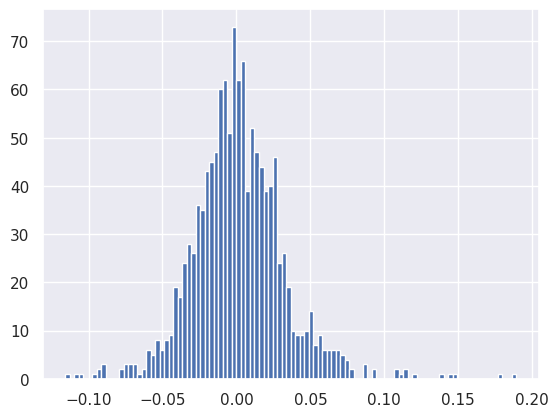

In [86]:
import seaborn as sns
sns.set()


df.Daily_Change.hist(bins=100)

<Axes: xlabel='Date'>

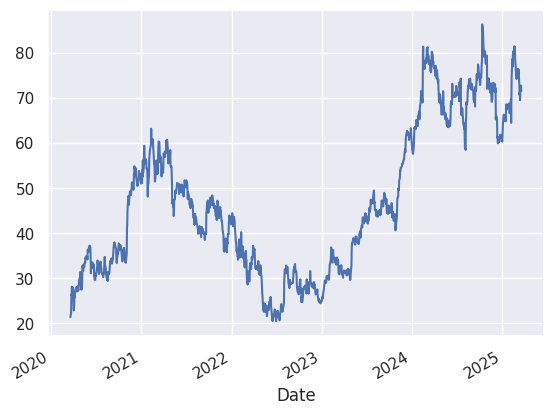

In [87]:
df.Close.plot()

### <a name='a7'></a> Filtrowanie danych

In [88]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-03-20,22.530,23.8900,20.6100,21.33,76529684,21.9300,NaN,NaN
2020-03-23,21.070,22.7300,19.7300,22.40,47787094,21.7350,21.33,0.050164
2020-03-24,24.410,26.8400,23.5900,26.39,58505016,25.4000,22.40,0.178125
2020-03-25,26.180,28.4500,25.3104,26.19,52473945,26.1850,26.39,-0.007579
2020-03-26,26.600,28.4400,25.7800,28.12,41370842,27.3600,26.19,0.073692
...,...,...,...,...,...,...,...,...
2025-03-12,72.310,72.4200,69.5500,71.20,17315032,71.7550,70.65,0.007785
2025-03-13,71.725,72.0000,69.3600,69.51,15272232,70.6175,71.20,-0.023736
2025-03-14,70.550,71.7899,70.3300,71.55,13537279,71.0500,69.51,0.029348


In [95]:
df_negative = df[df.Daily_Change < 0]
df_negative

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-03-25,26.180,28.450,25.3104,26.19,52473945,26.1850,26.39,-0.007579
2020-03-27,25.820,28.030,25.0700,27.28,40292212,26.5500,28.12,-0.029872
2020-04-01,26.500,26.767,24.8101,25.42,38538381,25.9600,27.92,-0.089542
2020-04-02,25.010,25.200,23.0000,23.68,35838237,24.3450,25.42,-0.068450
2020-04-03,23.730,23.790,21.6700,22.82,40572024,23.2750,23.68,-0.036318
...,...,...,...,...,...,...,...,...
2025-03-06,75.315,77.220,74.7254,74.96,16504911,75.1375,76.48,-0.019874
2025-03-10,74.780,75.490,71.9700,73.06,22120094,73.9200,76.27,-0.042087
2025-03-11,71.440,74.250,69.5700,70.65,26668190,71.0450,73.06,-0.032987


In [94]:
df_positive.Daily_Change.mean()

np.float64(-0.021340312657285566)

In [96]:
df_positive = df[df.Daily_Change > 0]
df_positive

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-03-23,21.070,22.7300,19.730,22.40,47787094,21.7350,21.33,0.050164
2020-03-24,24.410,26.8400,23.590,26.39,58505016,25.4000,22.40,0.178125
2020-03-26,26.600,28.4400,25.780,28.12,41370842,27.3600,26.19,0.073692
2020-03-30,26.330,28.3900,25.310,27.83,37725659,27.0800,27.28,0.020161
2020-03-31,27.750,28.2500,26.920,27.92,43126370,27.8350,27.83,0.003234
...,...,...,...,...,...,...,...,...
2025-03-05,75.650,76.9400,74.930,76.48,13122294,76.0650,75.26,0.016210
2025-03-07,74.045,76.6996,73.780,76.27,18610386,75.1575,74.96,0.017476
2025-03-12,72.310,72.4200,69.550,71.20,17315032,71.7550,70.65,0.007785


In [97]:
df_positive.Daily_Change.mean()

np.float64(0.024354239168861348)

In [100]:
df.Close == df.High

,0
Date,
2020-03-20,False
2020-03-23,False
2020-03-24,False
2020-03-25,False
2020-03-26,False
...,...
2025-03-12,False
2025-03-13,False
2025-03-14,False


In [101]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.004832
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,52.52,0.044554
2021-02-04,56.45,57.85,56.11,57.85,13847255,57.150,57.12,0.012780
2022-11-30,27.80,29.14,27.64,29.14,18177028,28.470,27.76,0.049712


In [102]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-03-20,22.530,23.8900,20.6100,21.33,76529684,21.9300,NaN,NaN
2020-03-23,21.070,22.7300,19.7300,22.40,47787094,21.7350,21.33,0.050164
2020-03-24,24.410,26.8400,23.5900,26.39,58505016,25.4000,22.40,0.178125
2020-03-25,26.180,28.4500,25.3104,26.19,52473945,26.1850,26.39,-0.007579
2020-03-26,26.600,28.4400,25.7800,28.12,41370842,27.3600,26.19,0.073692
...,...,...,...,...,...,...,...,...
2025-03-12,72.310,72.4200,69.5500,71.20,17315032,71.7550,70.65,0.007785
2025-03-13,71.725,72.0000,69.3600,69.51,15272232,70.6175,71.20,-0.023736
2025-03-14,70.550,71.7899,70.3300,71.55,13537279,71.0500,69.51,0.029348


In [105]:
df[df.index > '2025-03-05']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2025-03-06,75.315,77.2200,74.7254,74.96,16504911,75.1375,76.48,-0.019874
2025-03-07,74.045,76.6996,73.7800,76.27,18610386,75.1575,74.96,0.017476
2025-03-10,74.780,75.4900,71.9700,73.06,22120094,73.9200,76.27,-0.042087
2025-03-11,71.440,74.2500,69.5700,70.65,26668190,71.0450,73.06,-0.032987
2025-03-12,72.310,72.4200,69.5500,71.20,17315032,71.7550,70.65,0.007785
2025-03-13,71.725,72.0000,69.3600,69.51,15272232,70.6175,71.20,-0.023736
2025-03-14,70.550,71.7899,70.3300,71.55,13537279,71.0500,69.51,0.029348
2025-03-17,72.020,73.8100,71.7750,72.73,20577768,72.3750,71.55,0.016492
2025-03-18,72.200,72.6750,70.4802,71.55,16137507,71.8750,72.73,-0.016224


In [106]:
df[(df.index >= '2025-03-05') & (df.index < '2025-03-10')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2025-03-05,75.650,76.9400,74.9300,76.48,13122294,76.0650,75.26,0.016210
2025-03-06,75.315,77.2200,74.7254,74.96,16504911,75.1375,76.48,-0.019874
2025-03-07,74.045,76.6996,73.7800,76.27,18610386,75.1575,74.96,0.017476


In [107]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-03-20,22.530,23.8900,20.6100,21.33,76529684,21.9300,NaN,NaN
2020-03-23,21.070,22.7300,19.7300,22.40,47787094,21.7350,21.33,0.050164
2020-03-24,24.410,26.8400,23.5900,26.39,58505016,25.4000,22.40,0.178125
2020-03-25,26.180,28.4500,25.3104,26.19,52473945,26.1850,26.39,-0.007579
2020-03-26,26.600,28.4400,25.7800,28.12,41370842,27.3600,26.19,0.073692
...,...,...,...,...,...,...,...,...
2025-03-12,72.310,72.4200,69.5500,71.20,17315032,71.7550,70.65,0.007785
2025-03-13,71.725,72.0000,69.3600,69.51,15272232,70.6175,71.20,-0.023736
2025-03-14,70.550,71.7899,70.3300,71.55,13537279,71.0500,69.51,0.029348


In [111]:
df[df.index.month == 5]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-05-01,29.13,29.7200,28.325,28.39,19290192,28.760,30.27,-0.062108
2020-05-04,27.56,28.0700,26.580,27.42,23428333,27.490,28.39,-0.034167
2020-05-05,28.25,28.9088,27.440,28.07,30725371,28.160,27.42,0.023705
2020-05-06,27.50,28.0600,26.810,27.82,31076451,27.660,28.07,-0.008906
2020-05-07,29.60,31.6500,29.580,30.93,62229496,30.265,27.82,0.111790
...,...,...,...,...,...,...,...,...
2024-05-24,63.78,64.7600,63.620,64.26,10385892,64.020,63.60,0.010377
2024-05-28,64.61,64.6100,63.100,63.52,14213346,64.065,64.26,-0.011516
2024-05-29,63.01,65.3650,62.910,64.93,16987906,63.970,63.52,0.022198


In [112]:
df[df.index.year == 2025]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2025-01-02,62.190,63.3900,61.3100,63.17,25899072,62.6800,60.32,0.047248
2025-01-03,63.690,65.2200,63.4400,64.59,28553825,64.1400,63.17,0.022479
2025-01-06,66.970,67.3500,66.0400,66.31,32980652,66.6400,64.59,0.026630
2025-01-07,68.490,68.8400,65.9500,66.15,35347776,67.3200,66.31,-0.002413
2025-01-08,66.400,66.6800,64.1200,64.91,24523299,65.6550,66.15,-0.018745
2025-01-10,64.500,66.6000,63.9600,65.97,30728846,65.2350,64.91,0.016330
2025-01-13,65.155,67.1950,65.0200,65.70,23960107,65.4275,65.97,-0.004093
2025-01-14,66.170,66.8100,64.6200,64.84,25735753,65.5050,65.70,-0.013090
2025-01-15,66.010,67.2450,66.0100,67.02,22704830,66.5150,64.84,0.033621
